# TELCO CUSTOMER CHURN PREDICTION

![Image by <a href="https://pixabay.com/users/mohamed_hassan-5229782/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=5836879">Mohamed Hassan</a> from <a href="https://pixabay.com//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=5836879">Pixabay</a>](attachment:image-2.png)
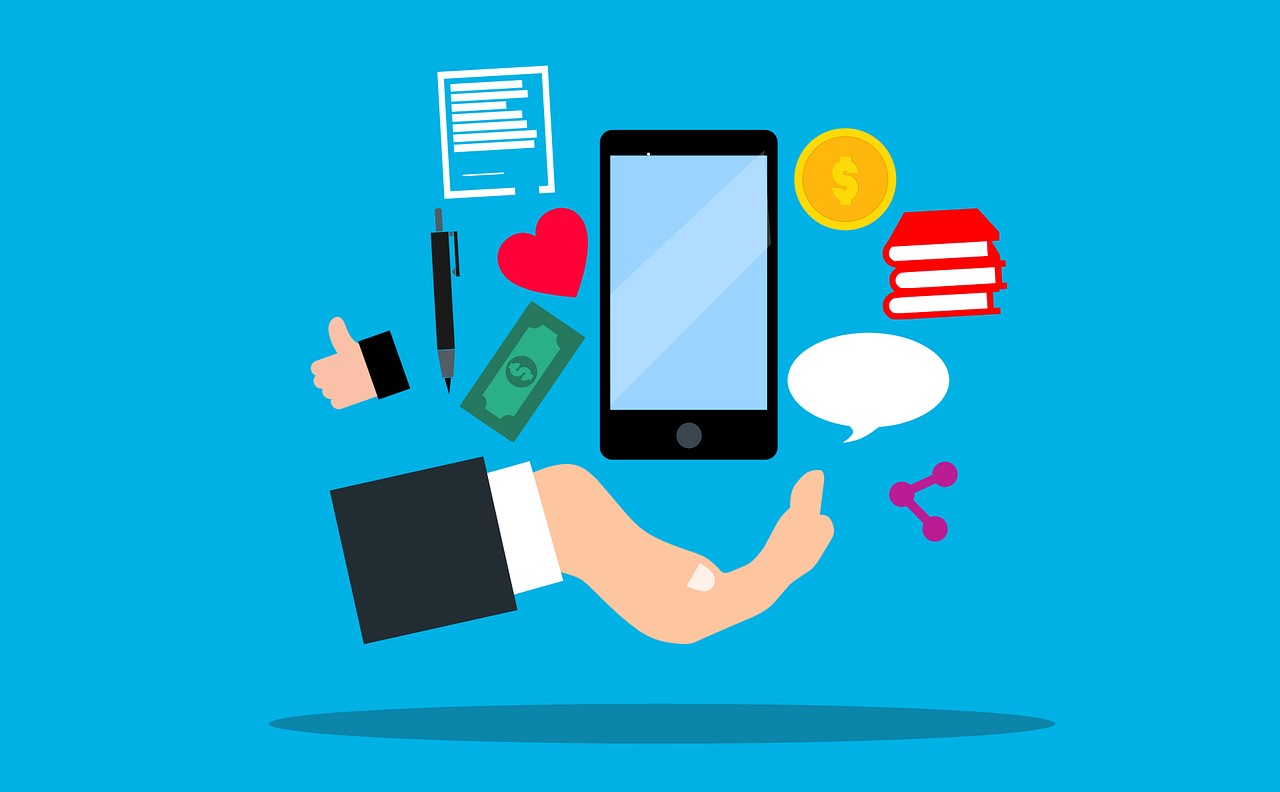

# Business Problem
A machine learning model is expected to be developed to predict customers who will leave the company.

# About Dataset

Telco customer churn data contains information about a fictitious telecommunications company that provides home phone and internet services to 7,043 customers in California in the third quarter. It shows which customers have churned (left the service), stayed, or signed up for the services.

---
- **CustomerId:** Customer ID
- **Gender:** Gender
- **SeniorCitizen:** Whether the customer is a senior citizen (1, 0)
- **Partner:** Whether the customer has a partner (Yes, No) - Indicates whether the customer is married or not.
- **Dependents:** Whether the customer has dependents (Yes, No) - Refers to whether the customer has people to care for (e.g., -children, parents, grandparents).
- **Tenure:** The number of months the customer has stayed with the company.
- **PhoneService:** Whether the customer has phone service (Yes, No)
- **MultipleLines:** Whether the customer has multiple lines (Yes, No, No phone service)
- **InternetService:** The customer's internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity:** Whether the customer has online security (Yes, No, No internet service)
- **OnlineBackup:** Whether the customer has online backup (Yes, No, No internet service)
- **DeviceProtection:** Whether the customer has device protection (Yes, No, No internet service)
- **TechSupport:** Whether the customer has technical support (Yes, No, No internet service)
- **StreamingTV:** Whether the customer has streaming TV (Yes, No, No internet service) - Indicates whether the customer uses internet - service to stream television programs from a third-party provider.
- **StreamingMovies:** Whether the customer has streaming movies (Yes, No, No internet service) - Indicates whether the customer uses - internet service to stream movies from a third-party provider.
- **Contract:** The customer's contract length (Month-to-month, One year, Two years)
- **PaperlessBilling:** Whether the customer has paperless billing (Yes, No)
- **PaymentMethod:** The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges:** The monthly amount charged to the customer
- **TotalCharges:** The total amount charged to the customer
- **Churn:** Whether the customer has churned (Yes or No) - Indicates whether the customer has left in the last month or quarter.
---

## Contents
1. **EXPLORATORY DATA ANALYSIS**
<br> Data Overview
<br> Categorical & Numerical Variable Analysis
<br> Data Visualizations
<br> Target Analysis
<br> Correlation Matrix

---
2. **DATA PREPROCESSING & FEATURE ENGINEERING**
<br> Missing Values
<br> Outliers
<br> Feature Extraction
<br> Encoding
<br> Feature Scaling

---
3. **MODELLING**
<br> Base Model
<br> Hyperparameter Optimization
<br> Final Model
<br> Feature Importance

# Loading Dataset & Importing Required Libraries and Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

sns.set_palette("Set2")

data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = data.copy()

# 1. Exploratory Data Analysis

# 1.1 Data Overview

In [2]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.100,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.750,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.150,3487.95,No


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.650,6844.5,No


In [4]:
# mistakes in data types fixed
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
# target variable is numericized
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

In [5]:
def overview_df(dataframe):
    
    print(f"Shape: {dataframe.shape}")
    print("------------------------------ Data Types ------------------------------")
    print(dataframe.dtypes)
    print("------------------------------ Unique Values -----------------------------")
    print(dataframe.nunique())
    print("------------------------------ NaN Values -----------------------------")
    print(dataframe.isnull().sum())
    print("------------------------------ Quantiles ------------------------------")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    

overview_df(df)

Shape: (7043, 21)
------------------------------ Data Types ------------------------------
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object
------------------------------ Unique Values -----------------------------
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineS

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Provides the names of categorical, numeric, and categorical-like but cardinal variables in the dataset.
    Note: Numeric-looking categorical variables are also included in categorical variables.

    Parameters
    ------
    dataframe: dataframe
            DataFrame from which variable names are to be extracted.
    cat_th: int, optional
            Class threshold value for numeric but categorical variables.
    car_th: int, optional
            Class threshold value for categorical but cardinal variables.

    Returns
    ------
        cat_cols: list
                List of categorical variable names.
        num_cols: list
                List of numeric variable names.
        cat_but_car: list
                List of categorical-like but cardinal variable names.

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))
        

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables.
        num_but_cat is within cat_cols.
    """
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'Categorical Columns: {len(cat_cols)}')
    print(f'Numerical Columns: {len(num_cols)}')
    print(f'Cardinals: {len(cat_but_car)}')
    print(f'Numeric but Categoricals: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df, car_th=10)

Observations: 7043
Variables: 21
Categorical Columns: 17
Numerical Columns: 3
Cardinals: 1
Numeric but Categoricals: 2


In [7]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen',
 'Churn']

In [8]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [9]:
cat_but_car

['customerID']

# 1.2 Categorical & Numerical Variable Analysis

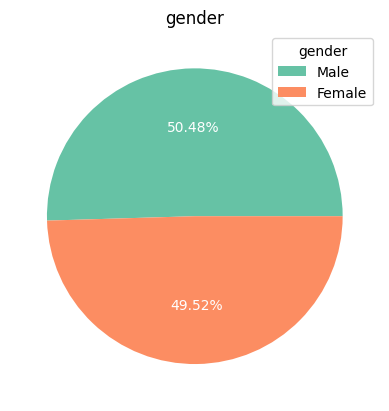

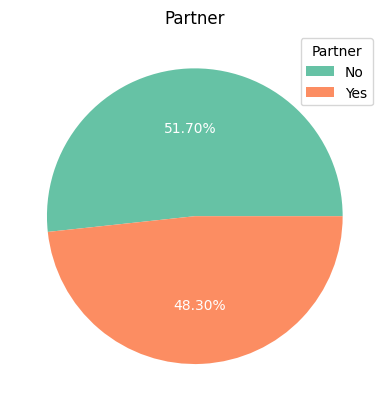

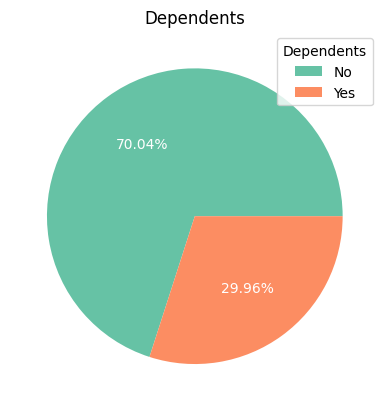

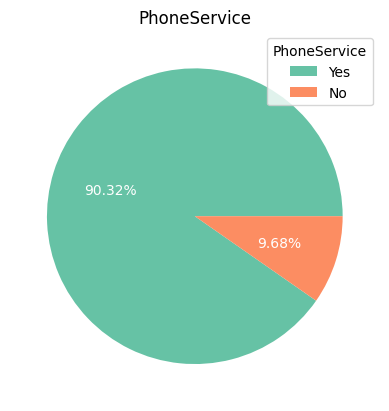

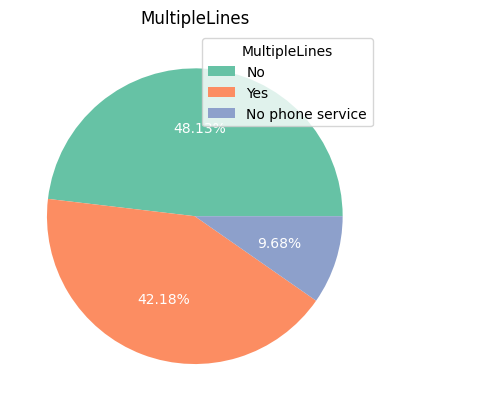

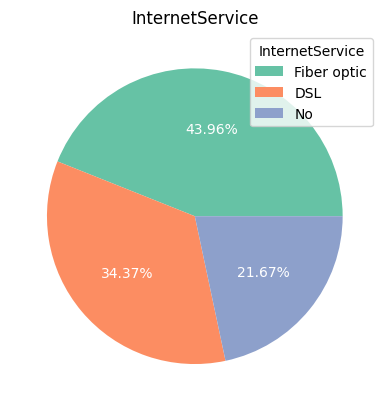

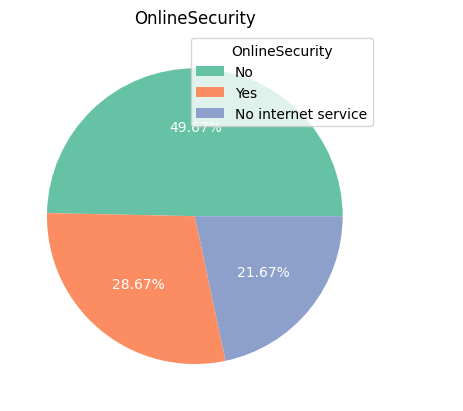

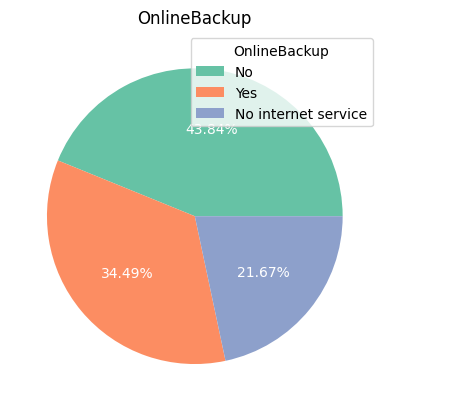

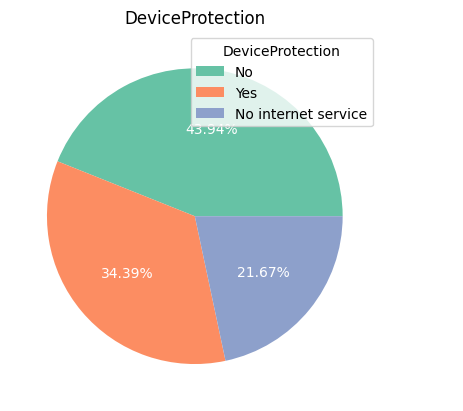

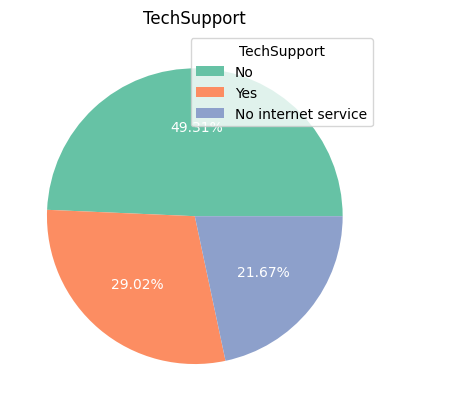

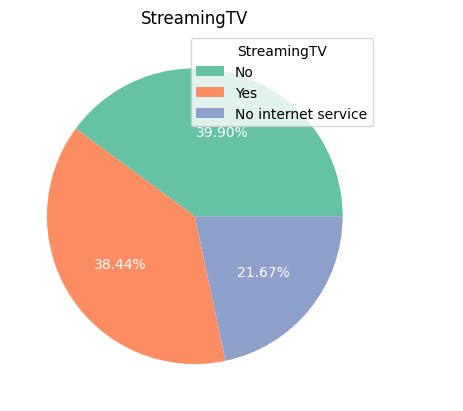

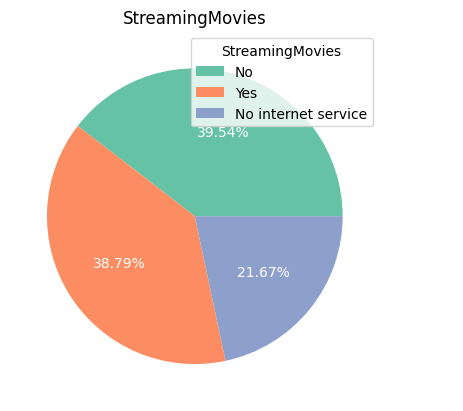

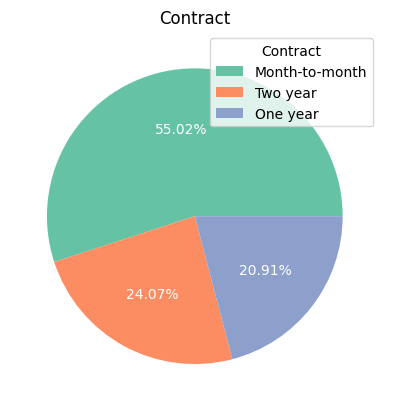

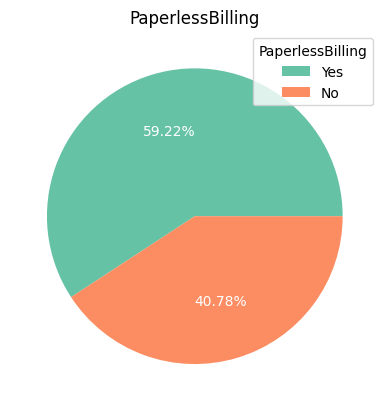

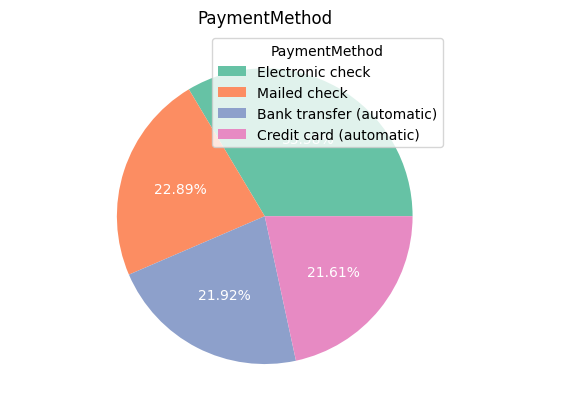

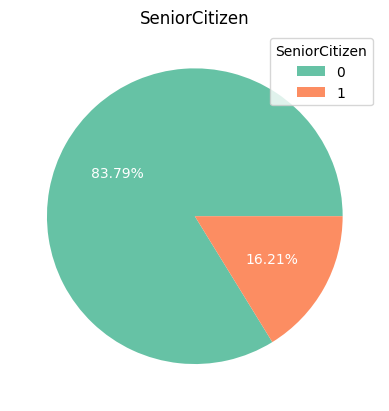

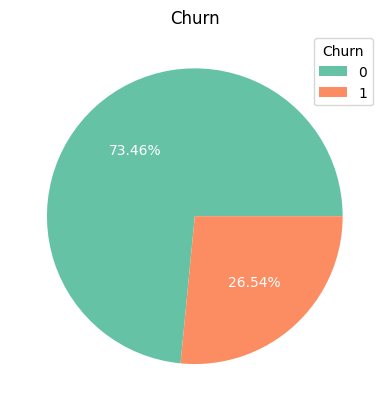

In [10]:
def cat_summary(dataframe, column, plot=True):
    value_counts = dataframe[column].value_counts()
    ratio = 100 * value_counts / len(dataframe)
    
    # visualized summary with pie chart
    if plot:
        y = value_counts.values
        labels = value_counts.index
        plt.title(f"{column}")
        plt.pie(y, labels=labels, autopct='%1.2f%%', textprops=dict(color="w"))
        plt.legend(title = f"{column}")
        plt.show()
    
    else:
        # documentation summary with dataframe
        summary_df = pd.DataFrame({column: value_counts,
                                   "Ratio": ratio})
        print(summary_df)
        
        
for col in cat_cols:
    cat_summary(df, col, True)

count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


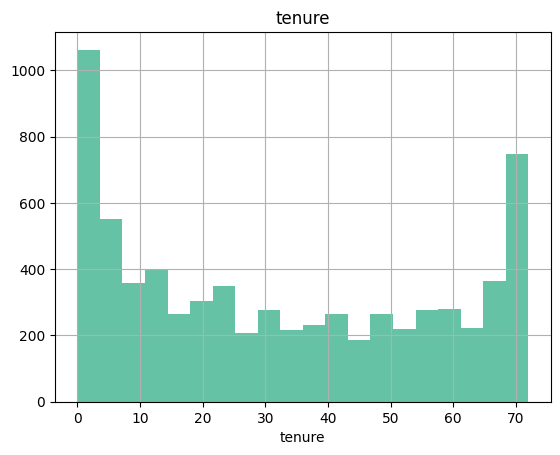

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


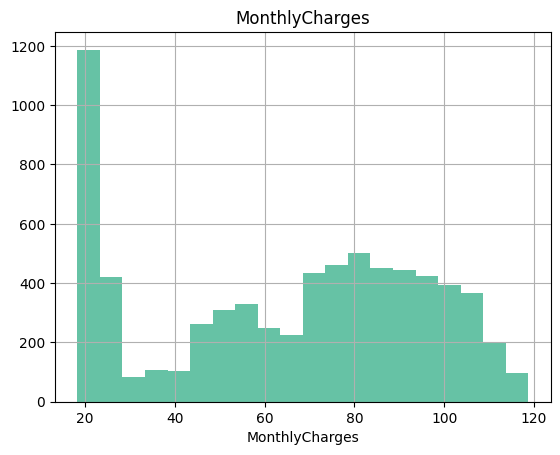

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


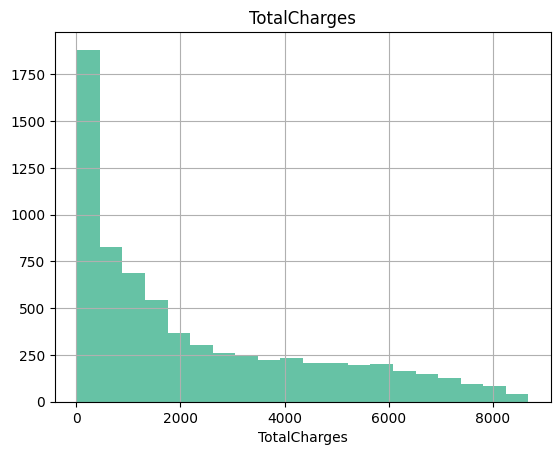

In [12]:
def num_summary(dataframe, numerical_col, plot=True):
    # documentatiton summary with quantiles
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    # visualized summary with histogram
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

        
for col in num_cols:
    num_summary(df, col)

# 1.3 Data Visualization

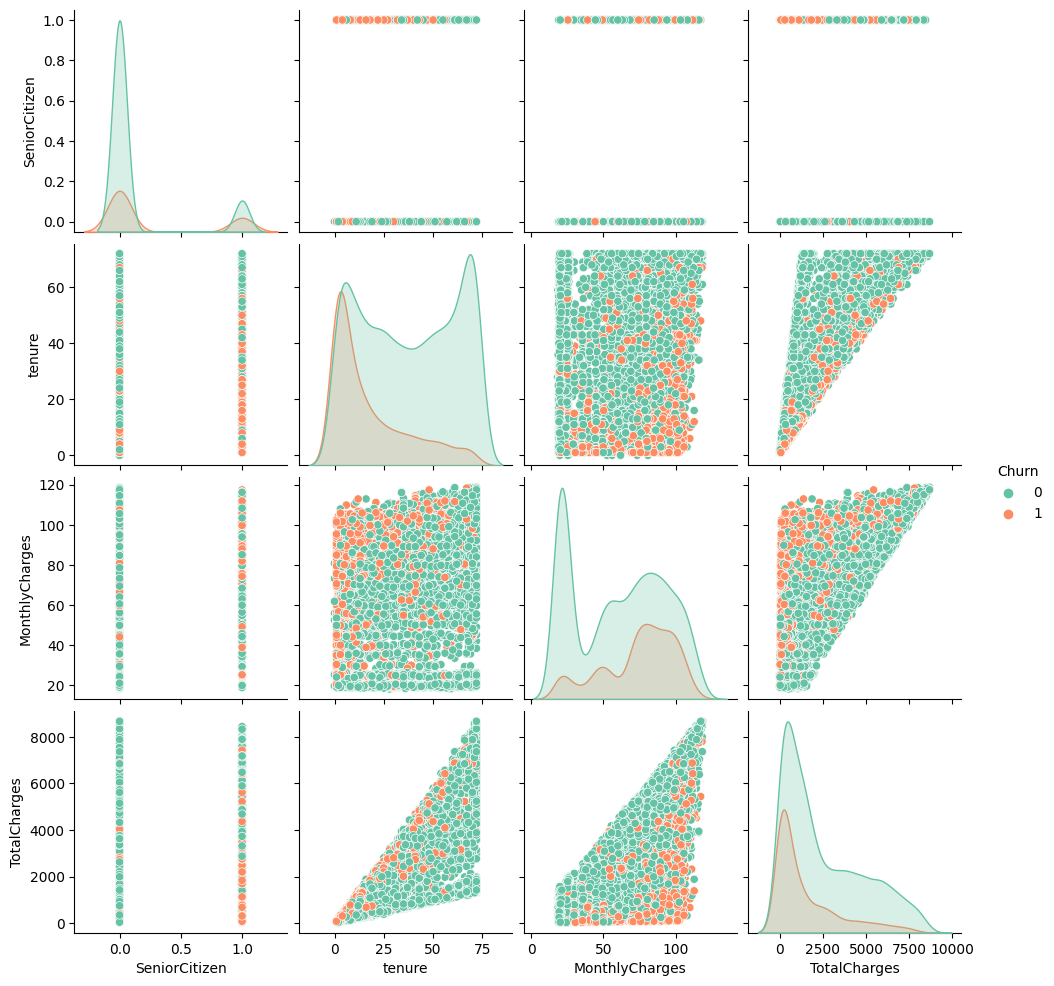

In [13]:
sns.pairplot(df, hue="Churn")

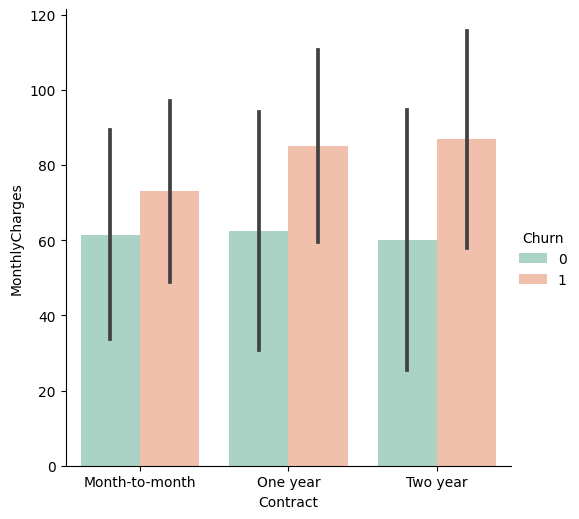

In [14]:
g = sns.catplot(data=df, kind="bar",
                x="Contract", y="MonthlyCharges", hue="Churn",
                errorbar="sd", alpha=.6, height=5.3)

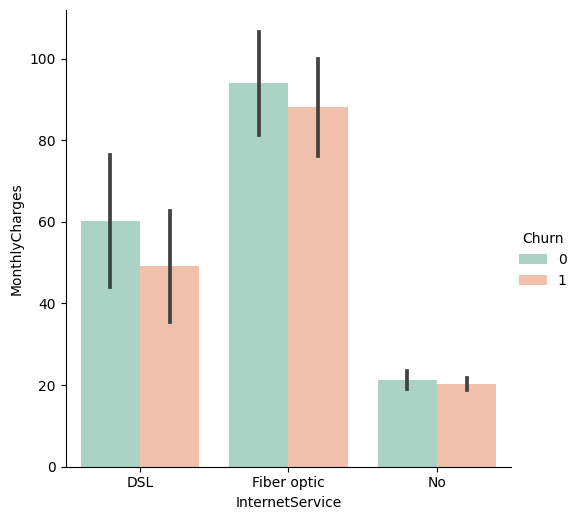

In [15]:
g = sns.catplot(data=df, kind="bar",
                x="InternetService", y="MonthlyCharges", hue="Churn",
                errorbar="sd", alpha=.6, height=5.3)

<AxesSubplot: xlabel='Contract', ylabel='tenure'>

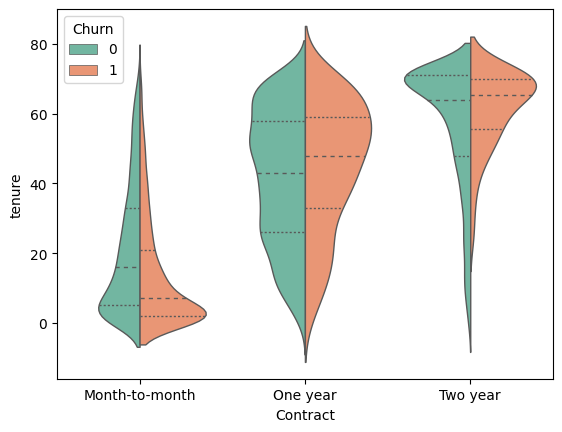

In [16]:
sns.violinplot(data=df, x="Contract", y="tenure", hue="Churn",
               split=True, inner="quart", linewidth=1)

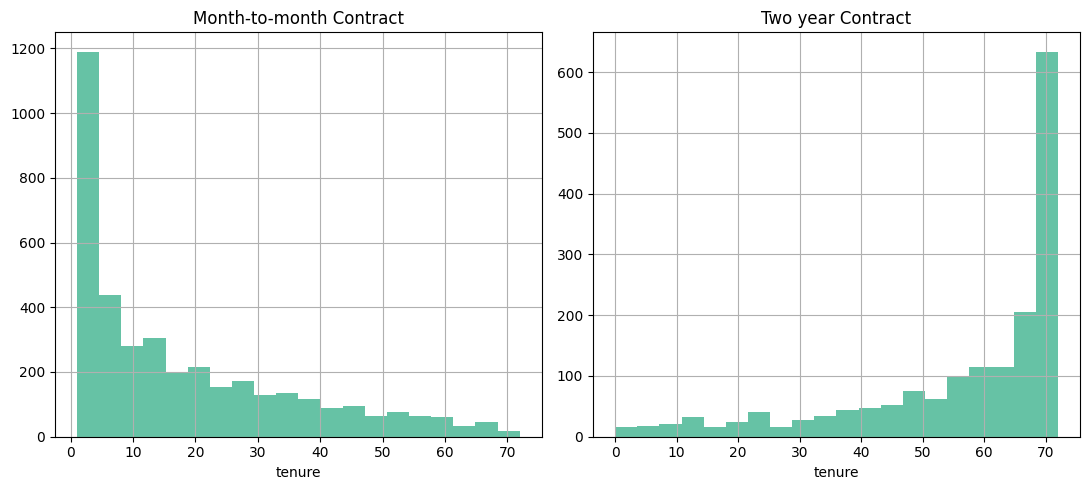

In [17]:
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
df[df["Contract"] == "Month-to-month"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Month-to-month Contract")

plt.subplot(1, 2, 2)
df[df["Contract"] == "Two year"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Two year Contract")

plt.tight_layout()
plt.show()

# 1.4 Target Analysis

## Target Analysis with Categorical Variables

In [18]:
def target_vs_cat(dataframe, target, categorical_col):
    target_vs_cat_df = pd.DataFrame({"Count": dataframe.groupby(categorical_col)[target].value_counts()})
    print(target_vs_cat_df, end="\n\n")
    
    
for col in cat_cols:
    if col != "Churn":
        target_vs_cat(df, "Churn", col)

              Count
gender Churn       
Female 0       2549
       1        939
Male   0       2625
       1        930

               Count
Partner Churn       
No      0       2441
        1       1200
Yes     0       2733
        1        669

                  Count
Dependents Churn       
No         0       3390
           1       1543
Yes        0       1784
           1        326

                    Count
PhoneService Churn       
No           0        512
             1        170
Yes          0       4662
             1       1699

                        Count
MultipleLines    Churn       
No               0       2541
                 1        849
No phone service 0        512
                 1        170
Yes              0       2121
                 1        850

                       Count
InternetService Churn       
DSL             0       1962
                1        459
Fiber optic     0       1799
                1       1297
No              0       1413
      

## Target Analysis with Numerical Variables

In [19]:
def target_vs_num(dataframe, target, numerical_col):
    target_vs_num_df = dataframe.groupby(target).agg({numerical_col: "mean"})
    print(target_vs_num_df, end="\n\n")
    
    
for col in num_cols:
    target_vs_num(df, "Churn", col)

       tenure
Churn        
0      37.570
1      17.979

       MonthlyCharges
Churn                
0              61.265
1              74.441

       TotalCharges
Churn              
0          2555.344
1          1531.796



# 1.5 Correlation Matrix

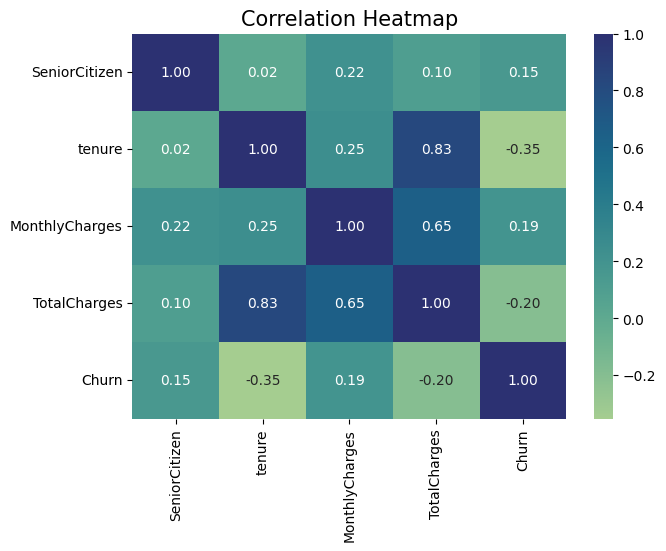

In [20]:
corr = df.corr()
f, ax = plt.subplots(figsize=[7, 5])
ax.set_title("Correlation Heatmap", fontsize=15)
sns.heatmap(corr, annot=True, fmt=".2f", ax=ax, cmap="crest")
plt.show()

In [21]:
df.corrwith(df["Churn"]).sort_values(ascending=False)

Churn             1.000
MonthlyCharges    0.193
SeniorCitizen     0.151
TotalCharges     -0.199
tenure           -0.352
dtype: float64

# 2. Data Pre-processing & Feature Engineering

# 2.1 Missing Values

In [22]:
def missing_values(dataframe, na_name=False):
    # find columns with missing values
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    
    # calculate missing value statistics
    n_missing = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (n_missing / dataframe.shape[0] * 100).sort_values(ascending=False)
    
    # create and print a DataFrame to display missing value information
    missing_df = pd.concat([n_missing, np.round(ratio, 2)],
                           axis=1, keys=['n_missing', 'ratio'])
    print(missing_df)
    
    # return columns with missing values if na_name is True
    if na_name:
        return na_columns
    
    
missing_values(df)

              n_missing  ratio
TotalCharges         11  0.160


In [23]:
# imputation for missing values with median
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

In [24]:
df.isnull().sum().any()

False

# 2.2 Outliers

## Outlier Observation with IQR Method

In [25]:
def outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    quantile1 = dataframe[variable].quantile(q1)
    quantile3 = dataframe[variable].quantile(q3)
    interquantile_range = quantile3 - quantile1
    up_limit = quantile3 + 1.5 * interquantile_range
    low_limit = quantile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [26]:
def check_outlier(dataframe, column):
    low_limit, up_limit = outlier_thresholds(dataframe, column)
    
    if dataframe[(dataframe[column] > up_limit) | (dataframe[column] < low_limit)].any(axis=None):
        return True
    
    else:
        return False
    

for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


## Visual Outlier Observation with Boxplot

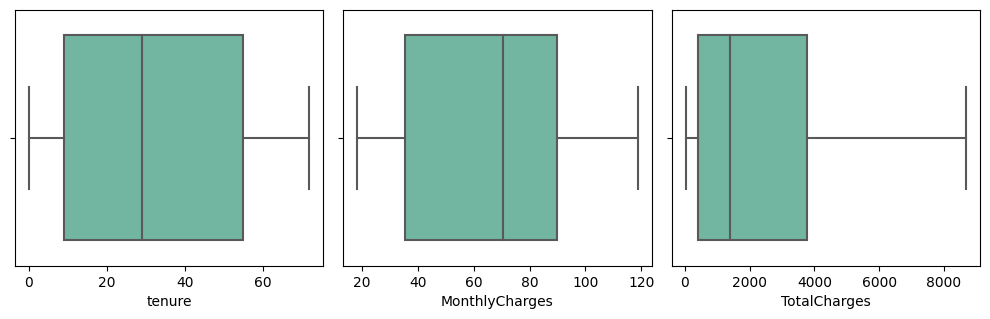

In [27]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
sns.boxplot(x=df["tenure"])
plt.subplot(2, 3, 2)
sns.boxplot(x=df["MonthlyCharges"])
plt.subplot(2, 3, 3)
sns.boxplot(x=df["TotalCharges"])

plt.tight_layout()
plt.show()

# 2.3 Feature Extraction

In [28]:
# new tenure corresponding values as years
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12), "new_TenureAsYear"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24), "new_TenureAsYear"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36), "new_TenureAsYear"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48), "new_TenureAsYear"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60), "new_TenureAsYear"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72), "new_TenureAsYear"] = "5-6 Year"

# total personal service and supports 
df['new_TotalServices'] = (df[["OnlineSecurity", "OnlineBackup", "DeviceProtection",
                          "TechSupport"]]== "Yes").sum(axis=1)

# billing and payment online, online transactions
df["new_OnlineTransaction"] = df.apply(lambda x: 1
                                    if (x["PaperlessBilling"] == "Yes")
                                    or ((x["PaymentMethod"] == "Electronic check") or (x["PaymentMethod"] == "Mailed check"))
                                    else 0, axis=1)

# regular customers with 1 or 2 years contract
df["new_Regular"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

# internet service with fiber optic
df["new_FiberOptic"] = df.apply(lambda x: 1
                                    if (x["InternetService"] == "Fiber optic")
                                    else 0, axis=1)

# any streaming
df["new_AnyStreaming"] = df.apply(lambda x: 1
                              if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes")
                              else 0, axis=1)

In [29]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,new_TenureAsYear,new_TotalServices,new_OnlineTransaction,new_Regular,new_FiberOptic,new_AnyStreaming
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,1,1,0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,2,1,1,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,2,1,0,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,3,0,1,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0,1,0,1,0
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650,820.500,1,0-1 Year,1,1,0,1,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.100,1949.400,0,1-2 Year,1,1,0,1,1
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.750,301.900,0,0-1 Year,1,1,0,0,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800,3046.050,1,2-3 Year,2,1,0,1,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.150,3487.950,0,5-6 Year,2,0,1,0,0


# 2.4 Encoding

In [30]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 27
Categorical Columns: 23
Numerical Columns: 3
Cardinals: 1
Numeric but Categoricals: 7


## Label Encoding

In [31]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [32]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and
               df[col].nunique() == 2]
binary_cols

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [33]:
for col in binary_cols:
    df = label_encoder(df, col)

## One Hot Encoding

In [34]:
cat_cols = [col for col in cat_cols if col not in binary_cols and
            col not in ["Churn", "new_TotalServices"]]
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'new_TenureAsYear',
 'SeniorCitizen',
 'new_OnlineTransaction',
 'new_Regular',
 'new_FiberOptic',
 'new_AnyStreaming']

In [35]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [36]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

# 2.5 Feature Scaling

In [37]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# 3. Modelling

# 3.1 Base Model

In [38]:
# model building
y = df["Churn"]
X = df.drop(["Churn", "customerID"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [39]:
models = [('LR', LogisticRegression()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVM', SVC(gamma='auto')),
          ('XGB', XGBClassifier()),
          ("LightGBM", LGBMClassifier()),
          ("CatBoost", CatBoostClassifier(verbose=False))]

In [40]:
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"----------- {name} -----------")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

----------- LR -----------
Accuracy: 0.8051
Auc: 0.8478
Recall: 0.5297
Precision: 0.6677
F1: 0.5903
----------- CART -----------
Accuracy: 0.7285
Auc: 0.66
Recall: 0.5094
Precision: 0.4894
F1: 0.4988
----------- RF -----------
Accuracy: 0.7937
Auc: 0.8274
Recall: 0.4933
Precision: 0.6465
F1: 0.5595
----------- SVM -----------
Accuracy: 0.7968
Auc: 0.8149
Recall: 0.442
Precision: 0.6802
F1: 0.5355
----------- XGB -----------
Accuracy: 0.7876
Auc: 0.8256
Recall: 0.5121
Precision: 0.6231
F1: 0.5615
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1682, number of negative: 4656
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 6338, number of used features:

  File "C:\Users\SUDE\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\SUDE\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SUDE\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\SUDE\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1493, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1682, number of negative: 4656
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 6338, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265383 -> initscore=-1.018173
[LightGBM] [Info] Start training from score -1.018173
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1682, number of negative: 4656
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_c

# 3.2 Hyperparameter Optimization

In [41]:
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()
lgbm_model = LGBMClassifier()

model_list = [rf_model, xgb_model, lgbm_model]

def get_parameters(model):
    print(f"{model} Parameters:", end="\n\n")
    print(model.get_params(), end="\n\n\n")
    
    
for model in model_list:
    get_parameters(model)

RandomForestClassifier() Parameters:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              m

In [42]:
rf_params = {"max_depth": [5, 7, None],
             "max_features": [3, 5, "sqrt"],
             "min_samples_split": [2, 5, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgb_params = {"learning_rate": [0.1, 0.01, None],
              "max_depth": [5, 7, None],
              "n_estimators": [100, 200, 500, 1000],
              "colsample_bytree": [0.5, 0.7, 1]}

lgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
               "n_estimators": [100, 200, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

# 3.3 Random Forests

In [43]:
rf_gscv = GridSearchCV(rf_model,
                       rf_params,
                       cv=5,
                       n_jobs=-1,
                       verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [44]:
rf_gscv.best_params_

{'max_depth': None,
 'max_features': 3,
 'min_samples_split': 20,
 'n_estimators': 100}

In [45]:
rf_final = rf_model.set_params(**rf_gscv.best_params_, random_state=13).fit(X_train, y_train)

In [46]:
cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "roc_auc"])

In [47]:
cv_results['test_accuracy'].mean()

0.8022132898130238

In [48]:
cv_results['test_roc_auc'].mean()

0.8443129415444517

# 3.4 XGBoost

In [49]:
xgb_gscv = GridSearchCV(xgb_model,
                        xgb_params,
                        cv=5,
                        n_jobs=-1,
                        verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [50]:
xgb_gscv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 500}

In [51]:
xgb_final = xgb_model.set_params(**xgb_gscv.best_params_, random_state=13).fit(X_train, y_train)

In [52]:
cv_results = cross_validate(xgb_final, X, y, cv=10, scoring=["accuracy", "roc_auc"])

In [53]:
cv_results['test_accuracy'].mean()

0.8030649580915539

In [54]:
cv_results['test_roc_auc'].mean()

0.8474739312779164

# 3.5 Final Model Prediction

In [61]:
y_pred = xgb_final.predict(X_test)
y_prob = xgb_final.predict_proba(X_test)[:, 1]

In [62]:
random_user = X.sample(1, random_state=13)
lgbm_model.predict(random_user)

array([0], dtype=int64)

# 3.6 Feature Importance

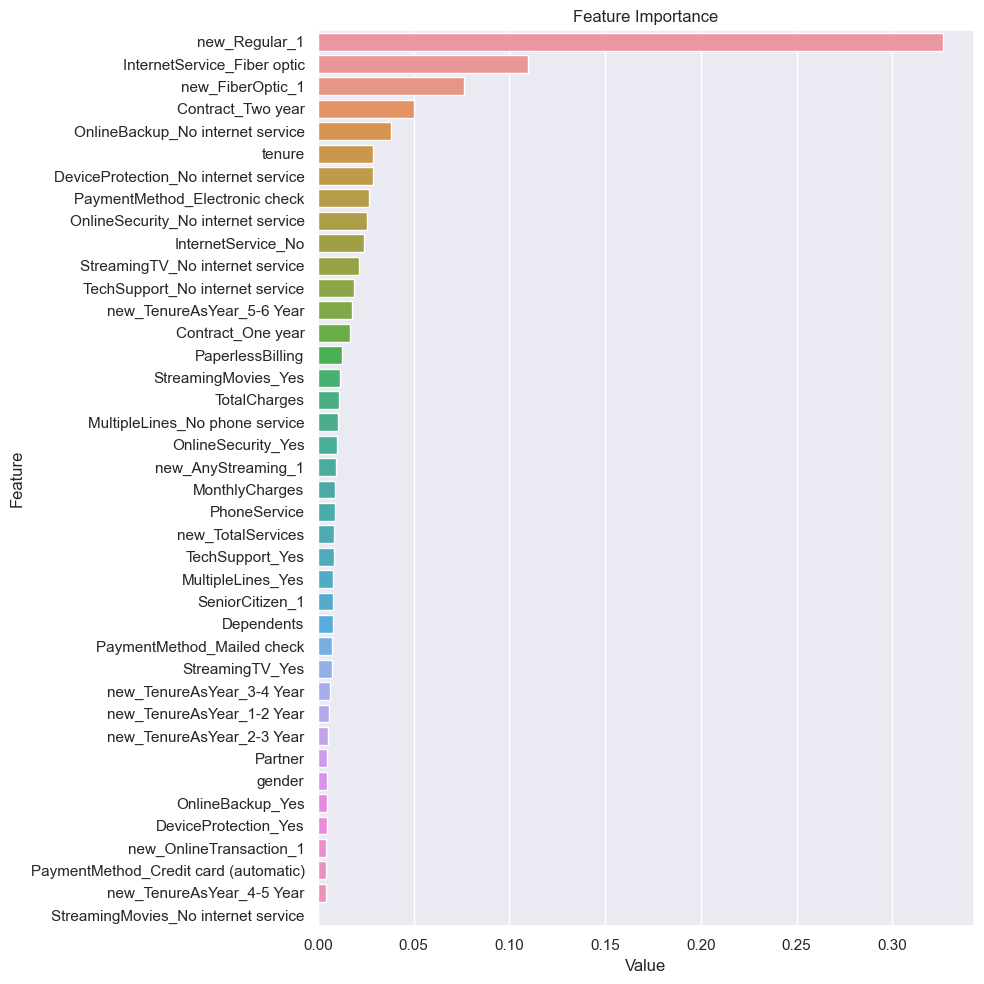

In [65]:
def plot_importance(model, features, num=len(X), save=False):
    
    feature_imp = pd.DataFrame({'Value': model.feature_importances_,
                                'Feature': features.columns})
    
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()
    
    if save:
        plt.savefig('importances.png')
        

plot_importance(xgb_final, X_train)